## Plazas Disponibles Hotelero 2024 - random_forest

**Paso 1: Importar las librerías necesarias**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**Paso 2: Leer los archivos Excel**

In [31]:
# Leer los archivos Excel
#file_path1 = 'data1.xlsx'
#file_path2 = 'data2.xlsx'
#df1 = pd.read_excel(file_path1, sheet_name='Sheet1')
#df2 = pd.read_excel(file_path2, sheet_name='Sheet1')
datos1 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name="Ushuaia_1", skipfooter=2)
datos2 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name="Ushuaia_2", skipfooter=2)
print(datos1)

     Periodo             Mes Establecimientos Plazas disponibles  \
0       2008           enero               43              96224   
1       2008         febrero               44              87580   
2       2008           marzo               44              96069   
3       2008           abril               43              90570   
4       2008            mayo               42              90737   
..       ...             ...              ...                ...   
187     2023      agosto (*)               33             118885   
188     2023  septiembre (*)               33             115050   
189     2023      octubre(*)               33             118637   
190     2023    noviembre(*)               33             113400   
191     2023    diciembre(*)               33             115613   

    Habitaciones o Unidades disponibles  
0                                 38936  
1                                 34945  
2                                 38998  
3              

In [33]:
print(datos2)

     Periodo             Mes Establecimientos Plazas disponibles  \
0       2008           enero              104              70649   
1       2008         febrero              103              64467   
2       2008           marzo              103              68359   
3       2008           abril               94              57410   
4       2008            mayo               77              43314   
..       ...             ...              ...                ...   
187     2023      agosto (*)               37              33635   
188     2023  septiembre (*)               37              34620   
189     2023      octubre(*)               43              37975   
190     2023    noviembre(*)               42              35970   
191     2023    diciembre(*)               42              39742   

    Habitaciones o Unidades disponibles  
0                                 21452  
1                                 19372  
2                                 20864  
3              

**Paso 3: Combinar los DataFrames Combinamos los dos DataFrames en uno solo**

In [36]:
# Combinar los DataFrames
df = pd.concat([datos1, datos2], ignore_index=True)
# Print the combined data
print(df)

     Periodo             Mes Establecimientos Plazas disponibles  \
0       2008           enero               43              96224   
1       2008         febrero               44              87580   
2       2008           marzo               44              96069   
3       2008           abril               43              90570   
4       2008            mayo               42              90737   
..       ...             ...              ...                ...   
379     2023      agosto (*)               37              33635   
380     2023  septiembre (*)               37              34620   
381     2023      octubre(*)               43              37975   
382     2023    noviembre(*)               42              35970   
383     2023    diciembre(*)               42              39742   

    Habitaciones o Unidades disponibles  
0                                 38936  
1                                 34945  
2                                 38998  
3              

**Paso : Calculo de medidas descriptivas**

In [39]:
df.describe()

,Periodo
count,384.000000
mean,2015.500000
std,4.615786
min,2008.000000
25%,2011.750000
50%,2015.500000
75%,2019.250000
max,2023.000000


**Paso : Limpia los datos:**

In [42]:
df['Plazas disponibles'] = pd.to_numeric(df['Plazas disponibles'], errors='coerce')
df['Habitaciones o Unidades disponibles'] = pd.to_numeric(df['Habitaciones o Unidades disponibles'], errors='coerce')
print(df)

     Periodo             Mes Establecimientos  Plazas disponibles  \
0       2008           enero               43             96224.0   
1       2008         febrero               44             87580.0   
2       2008           marzo               44             96069.0   
3       2008           abril               43             90570.0   
4       2008            mayo               42             90737.0   
..       ...             ...              ...                 ...   
379     2023      agosto (*)               37             33635.0   
380     2023  septiembre (*)               37             34620.0   
381     2023      octubre(*)               43             37975.0   
382     2023    noviembre(*)               42             35970.0   
383     2023    diciembre(*)               42             39742.0   

     Habitaciones o Unidades disponibles  
0                                38936.0  
1                                34945.0  
2                                38998.0  

**Paso : Codifica variables categóricas:**

In [45]:
# Convertir la columna 'Mes' a cadena de texto
df['Mes'] = df['Mes'].astype(str)

# Codificar variables categóricas
label_encoders = {}
for column in ['Mes', 'Establecimientos']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # Convertir a cadena de texto antes de codificar
    label_encoders[column] = le


**Paso :  Elimina filas con valores nulos:**

In [48]:
df.dropna(inplace=True)
print(df)

     Periodo  Mes  Establecimientos  Plazas disponibles  \
0       2008    5                27             96224.0   
1       2008    6                28             87580.0   
2       2008   10                28             96069.0   
3       2008    0                27             90570.0   
4       2008   11                26             90737.0   
..       ...  ...               ...                 ...   
379     2023    2                21             33635.0   
380     2023   17                21             34620.0   
381     2023   15                27             37975.0   
382     2023   13                26             35970.0   
383     2023    4                26             39742.0   

     Habitaciones o Unidades disponibles  
0                                38936.0  
1                                34945.0  
2                                38998.0  
3                                36480.0  
4                                37386.0  
..                               

**Paso : Distribución de variables**

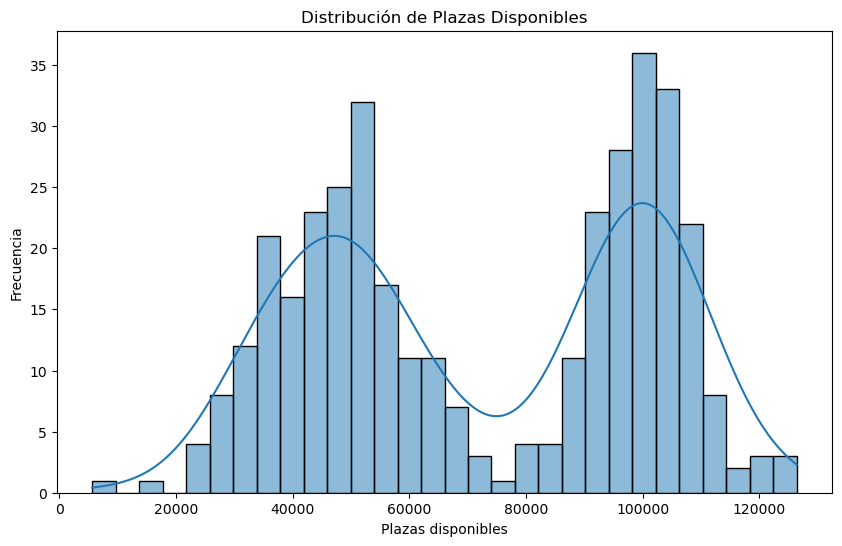

In [51]:
# Distribución de variables
plt.figure(figsize=(10, 6))
sns.histplot(df['Plazas disponibles'], bins=30, kde=True)
plt.title('Distribución de Plazas Disponibles')
plt.xlabel('Plazas disponibles')
plt.ylabel('Frecuencia')
plt.show()


**Paso : Correlaciones entre variables**

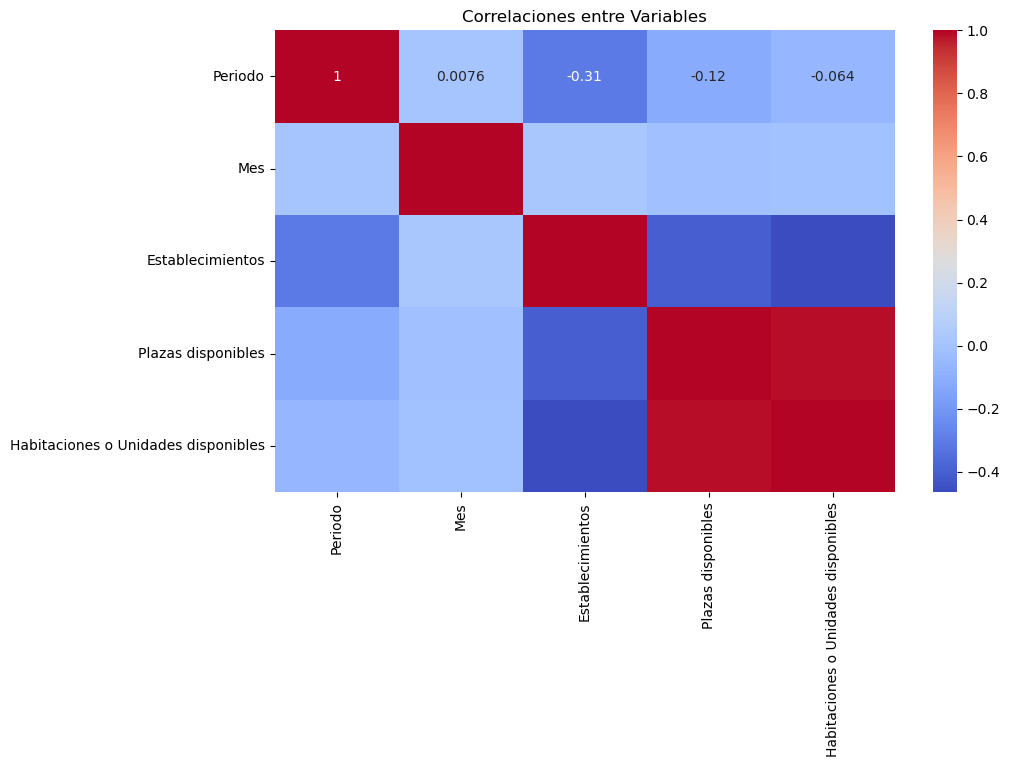

In [54]:
# Correlaciones entre variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlaciones entre Variables')
plt.show()

**Paso : Tendencias temporales**

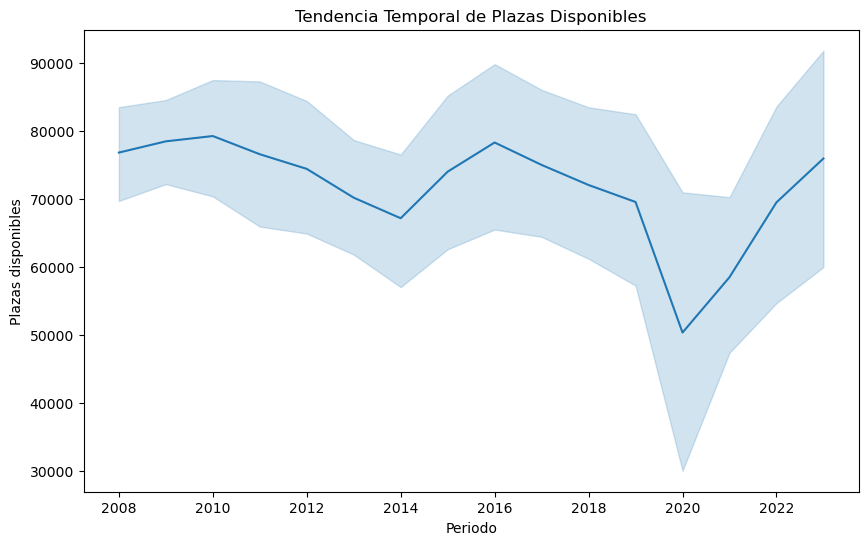

In [57]:
# Tendencias temporales
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Periodo', y='Plazas disponibles')
plt.title('Tendencia Temporal de Plazas Disponibles')
plt.xlabel('Periodo')
plt.ylabel('Plazas disponibles')
plt.show()

## Preparacion y entrenamiento de modelos de clasificación - random_forest

**Paso :  Define variables independientes y dependientes:**

In [61]:
X = df[['Mes', 'Establecimientos', 'Habitaciones o Unidades disponibles']]
y = df['Plazas disponibles']

**Paso :  Binariza la variable dependiente:**

In [64]:
y = (y > y.median()).astype(int)

**Paso :  Divide los datos en conjunto de entrenamiento y prueba:**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Paso : Entrena el modelo Random Forest:**

In [70]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Paso : Evalúa el modelo:**

In [73]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  1]
 [ 0 40]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.98      1.00      0.99        40

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



**Paso : predicciones en el conjunto de prueba**

In [76]:
# Inicializar y entrenar el modelo
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model_rf.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 0.021444594594594597
R² Score: 0.9136539705882353
